# Analytics Edge and Data Ethics Project 

## Youssef Ragab

License

MIT License

Copyright (c) 2021 jphall@gwu.edu

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

### Part 1 

The first step of the project is going to be to initialize our notebook, meaning that we are going to be importing all the necessary python libraries to make our work easier: 

In [14]:
from sklearn import tree 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score

import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict

import io

Seed = 1999

The next step is going to be to import out data into a pandas data frame: 

In [6]:
df = pd.read_csv('credit_line_increase.csv')

Now that we have the dataframe set, we are going to move on to answering the questions:

First, the column names:

In [7]:
df.columns 

Index(['ID', 'LIMIT_BAL', 'SEX', 'RACE', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DELINQ_NEXT'],
      dtype='object')

Next, we are going to see if there are any missing values in the data. To do that, we are simply going to sum all the null values from each variable, and then print the results. 

In [8]:
print(df.isnull().sum())

ID             0
LIMIT_BAL      0
SEX            0
RACE           0
EDUCATION      0
MARRIAGE       0
AGE            0
PAY_0          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
DELINQ_NEXT    0
dtype: int64


As we can see, there are no missing values in the training data. 

We are now going to look at the descriptive statistics for the dataset. 

In [9]:
df.describe()

ID       LIMIT_BAL           SEX          RACE     EDUCATION  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      2.721967      1.853133   
std     8660.398374   129747.661567      0.489129      1.094397      0.790349   
min        1.000000    10000.000000      1.000000      1.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      2.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      3.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      4.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      4.000000      6.000000   

           MARRIAGE           AGE         PAY_0         PAY_2         PAY_3  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       1.551867     35.485500     -0.016700     -0.133767     -0.166200   
std        0.521970      9.217904      1.123802      1.197186      1.196868   
min        0.000000     21.000000     -2.000000     -2.000000     -2.000000   
25%        1.000000     28.000000     -1.000000     -1.000000     -1.000000   
50%        2.000000     34.000000      0.000000      0.000000      0.000000   
75%        2.000000     41.000000      0.000000      0.000000      0.000000   
max        3.000000     79.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6   DELINQ_NEXT  
count   30000.000000  30000.000000  
mean     5215.502567      0.221200  
std     17777.465775      0.415062  
min         0.000000      0.000000  
25%       117.750000      0.000000  
50%      1500.000000      0.000000  
75%      4000.000000      0.000000  
max    528666.000000      1.000000  

[8 rows x 26 columns]

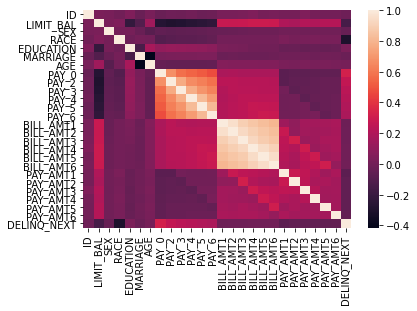

In [10]:
_ = sns.heatmap(df.corr(),
                xticklabels = df.columns.values,
                yticklabels = df.columns.values)

Looking at the correlation statistics, we see high correlation between a few sets of variables. We see high correlation between the bill amount, and pay. This is okay in the context of the data. All of these variables belong to the same person, it is understandable that their pay, bill amount, and pay amount is steady throughout the months these measurements were taken. 

In terms of creating the model, it does not make sense to keep variables that have such high correlation. We have 6 of each variable, and they are measured every month. It makes more sense to keep the first and last of each variable , since it is more likely to have changed over 6 months than month-to-month. We can see this in the graph, where the correlation decreases as the months increase, with the lowest correlation coming between month 1 and 6. Given all of this information, we are going to remove all the pay and bill amount variables, only keeping 1 and 6 for each. 

/Users/youssefragab/opt/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


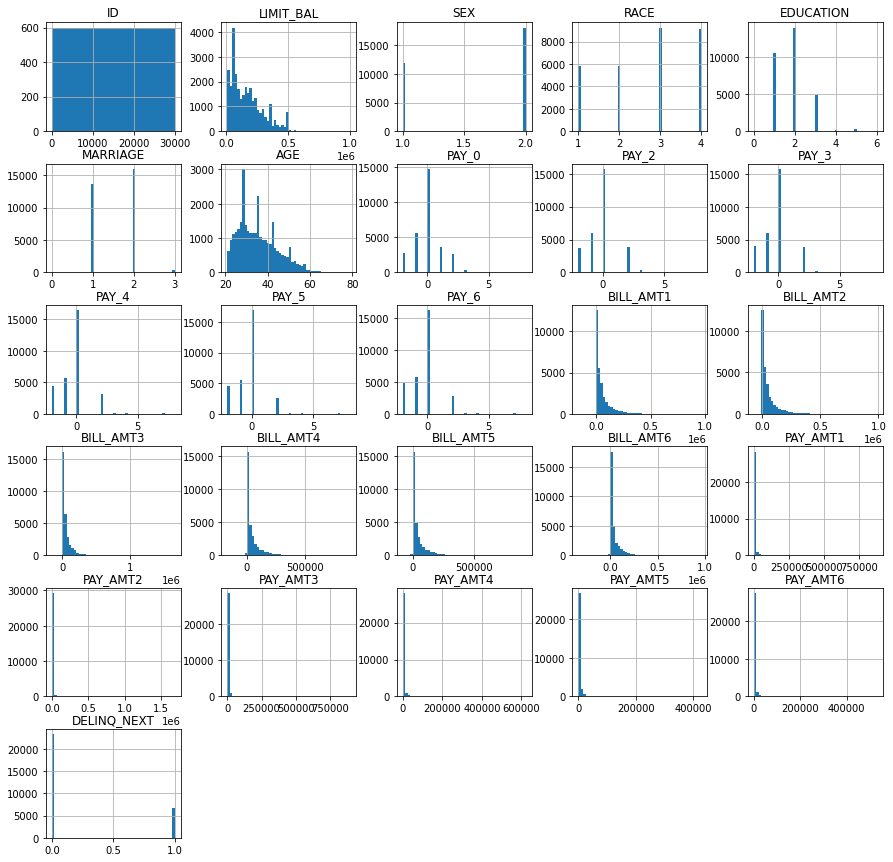

In [11]:
_ = df.hist(bins = 50, figsize= (15,15))

As noted from the correlation, all of the pay and bill amount histograms are almost identical. The pay amount variable also seems to be identical, but the reason we didn't get high correlation is likely htat the scale is too stretched to see the difference. 

##### Part 2 

Now we are going to start training the decision tree model. The first thing we are going to do is going to be to partition the data. We are using a 70/20/10 split for training, validation, and testing.

Before we start training the decision tree, we have to remove all the demographic variables from the data. These are: Sex, Race, Education, Marriage, and Age. 

### Training the decision model

We are first going to set the name of the X and Y variables. We are going to do a 60/20/20 split. This gives us enough data to train the data, while also allowing us to have enough testing and validation data to avoid overfitting the model. 

In [12]:
y_name = 'DELINQ_NEXT'
x_names = ['LIMIT_BAL', 'PAY_0', 'PAY_6', 'BILL_AMT1', 'BILL_AMT6',
           'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'] 

Next, we are going to partition the data: 

In [15]:
train_x, train_test_x, train_y, train_test_y = train_test_split(df[x_names], df[y_name], test_size = 0.6, random_state = Seed)
valid_x, test_x, valid_y, test_y = train_test_split(train_test_x, train_test_y, test_size = 0.5, random_state = Seed)

In [16]:
print(train_x.shape)
print(train_y.shape)
print()
print(valid_x.shape)
print(valid_y.shape)
print()
print(test_x.shape)
print(test_y.shape)

(12000, 11)
(12000,)

(9000, 11)
(9000,)

(9000, 11)
(9000,)


As we can see, we have the right amount of data points for each of the partitions. 

Now, we are going to train the model:

We are going to set the maximum depth to 12, as that is already too much and will overfit the data. The optimal depth will most likely be less than 12. 

In [17]:
max_depth = 12
candidate_models = {}

for depth in range(0, max_depth):

  clf = tree.DecisionTreeClassifier(max_depth = depth + 1, random_state=Seed)
  clf.fit(train_x, train_y)

  train_phat = clf.predict_proba(train_x)[:, 1]
  valid_phat = clf.predict_proba(valid_x)[:, 1]

  train_auc = roc_auc_score(train_y, train_phat)
  valid_auc = roc_auc_score(valid_y, valid_phat)

  candidate_models[depth + 1] = {}
  candidate_models[depth + 1]['Model'] = clf
  candidate_models[depth + 1]['Training AUC'] = train_auc
  candidate_models[depth + 1]['Validation AUC'] = valid_auc

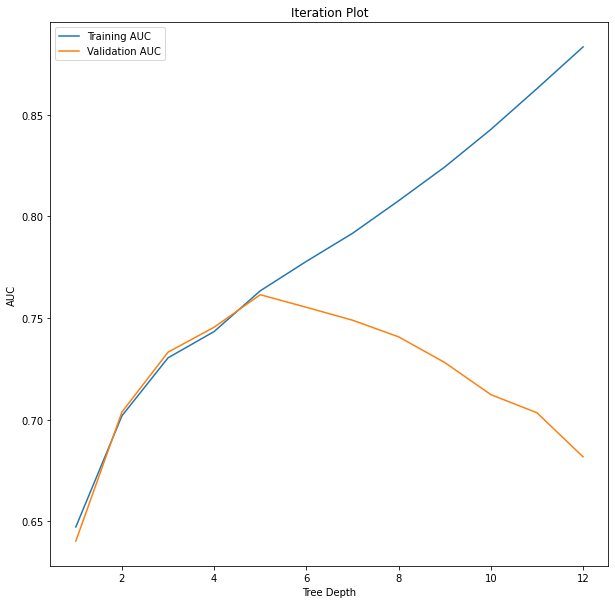

In [18]:
candidate_results = pd.DataFrame.from_dict(candidate_models, orient = 'index')
fig, ax = plt.subplots(figsize=(10,10))
_ = candidate_results[['Training AUC', 'Validation AUC']].plot(title = 'Iteration Plot', ax = ax)
_ = ax.set_xlabel('Tree Depth')
_ = ax.set_ylabel('AUC')

The iteration plot clearly shows us that the training and validation AUC are pretty much the same up until a depth of 5. After that, there seems to be overfitting of the training data.  

So we are going to select our best model as the model with a depth of 5. 

Now, we are going to look at what the tree looks like:

In [19]:
best_model = candidate_models[5]['Model']
fig = plt.figure(figsize=(400, 200))
_ = tree.plot_tree(best_model,
                   feature_names=x_names,
                   class_names=['On time', 'Delinquent'],
                   filled=True)

In [20]:
test_phat = best_model.predict_proba(test_x)[:, 1]
print('Test AUC: %.4f ' % roc_auc_score(test_y, test_phat))

Test AUC: 0.7464 


### Part 3: 

The next step is going to be to check for any discrimination against protected groups. To do that, we are going to have to create a new dataframe that we are going to call yhat. 

It is going to contain the following: 
* All the columns in valid_x that feature in our variable list x_names 
* The race variable
* The sex variable
* Our Y variable for comparison
* Finally, a prediction of Y (phat) that we are going to predict using the best model we created.

In [21]:
valid_yhat = pd.DataFrame(valid_x, columns = x_names)
valid_yhat['Race'] = df.loc[valid_yhat.index, 'RACE']
valid_yhat['Sex'] = df.loc[valid_yhat.index, 'SEX']
valid_yhat[y_name] = valid_y
valid_yhat['phat'] = best_model.predict_proba(valid_x)[:, 1]
valid_yhat.head()

LIMIT_BAL  PAY_0  PAY_6  BILL_AMT1  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
10805     270000      0     -1      14728       2460     10000      5000   
2190      100000      0      0     101430      99947      5001     64401   
25184      20000      0      0      17377       1970      1360      1286   
25288      60000      0      0      36604      30852      1765      1812   
15335     140000      0     -2      51270          0      4500      4117   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Race  Sex  DELINQ_NEXT  \
10805      3900      9486      2460         0   1.0    2            0   
2190       4000      4500      4200      3200   4.0    1            0   
25184      1000       987        39         0   2.0    2            0   
25288      1794      1290      1268      1273   3.0    2            0   
15335      3000         0         0         0   2.0    2            0   

           phat  
10805  0.088368  
2190   0.088368  
25184  0.161656  
25288  0.161656  
15335  0.088368

The next step is to create a function that creates a confusion matrix for the predicted and actual values of y and yhat. The function takes in a dataframe and the pointers to the Y column. And then we can choose the cutoff at which we want to reject people for the loans. 
The function then classifies the phat values based on the cutoff we provide, and compares the predicted and actual values. Finally, returning the confusion matrix. 

In [22]:
def get_confusion_matrix(frame, y, yhat, by=None, level=None, cutoff=0.5, verbose=True):

    level_list = list(frame[y].unique())
    level_list.sort(reverse=True)

    cm_frame = pd.DataFrame(columns=['actual: ' +  str(i) for i in level_list],
                            index=['predicted: ' + str(i) for i in level_list])

    frame_ = frame.copy(deep=True)

    dname = 'd_' + str(y)
    frame_[dname] = np.where(frame_[yhat] > cutoff , 1, 0)

    if (by is not None) & (level is not None):
        frame_ = frame_[frame[by] == level]

    for i, lev_i in enumerate(level_list):
        for j, lev_j in enumerate(level_list):
            cm_frame.iat[j, i] = frame_[(frame_[y] == lev_i) & (frame_[dname] == lev_j)].shape[0]

    if verbose:
        if by is None:
            print('Confusion matrix:')
        else:
            print('Confusion matrix by ' + by + '=' + str(level))

    return cm_frame

Next, we are going to create the function that calculates AIR. AIR has a simple formula, that just needs to be applied. The function takes in the dictionary that we are counting from and the values of the protected and reference groups. We will loop the function later since we need to run it 3 times for all the different levels of the variable race. The function finally returns the proportion of people accepted for both the reference and protected populations, and then an AIR score. 

In [23]:
def air(cm_dict, reference_key, protected_key, verbose = True):
    eps = 1e-20
    
    reference_accepted = float(cm_dict[reference_key].iat[1,0] + cm_dict[reference_key].iat[1,1])
    reference_total = float(cm_dict[reference_key].sum().sum())
    reference_prop = reference_accepted/reference_total
    if verbose:
        print(reference_key.title() + ' proportion accepted: %.3f' % reference_prop)
        
    protected_accepted = float(cm_dict[protected_key].iat[1,0] + cm_dict[protected_key].iat[1,1]) 
    protected_total = float(cm_dict[protected_key].sum().sum())
    protected_prop = protected_accepted/protected_total
    if verbose:
        print(protected_key.title() + ' proportion accepted: %.3f' % protected_prop)

    return ((protected_prop + eps)/(reference_prop + eps))

### Part 3: 

We are now going to calculate the AIR for each of the different levels of race and sex. To do that, we are first going to use the functions we created to create a confusion matrix and then calculate AIR For each different level of the variables race and sex. We create a dictionary with the different levels and the numbers they correspond to.Then we create the confusion matrix and calculate the AIR scores for each of them. 

In [24]:
race_dict = {'hispanic': 1, 
            'black': 2, 
            'white': 3,
            'asian': 4}

race_group_names = list(race_dict.keys())
race_cm_dict = {}

for name in race_group_names:
    race_cm_dict[name] = get_confusion_matrix(valid_yhat, y_name, 'phat', by = 'Race', level = race_dict[name], cutoff = 0.15)
    print(race_cm_dict[name])
    print('(%s)' % name.title())
    print()
    
for name in race_group_names:
    if name != 'white':
        print('%s-to-%s AIR: %.2f' % (name, 'white', air(race_cm_dict, 'white', name)))
        print()

Confusion matrix by Race=1
             actual: 1 actual: 0
predicted: 1       567       453
predicted: 0       151       584
(Hispanic)

Confusion matrix by Race=2
             actual: 1 actual: 0
predicted: 1       574       461
predicted: 0       136       582
(Black)

Confusion matrix by Race=3
             actual: 1 actual: 0
predicted: 1       252      1066
predicted: 0        69      1378
(White)

Confusion matrix by Race=4
             actual: 1 actual: 0
predicted: 1       232      1055
predicted: 0        69      1371
(Asian)

White proportion accepted: 0.523
Hispanic proportion accepted: 0.419
hispanic-to-white AIR: 0.80

White proportion accepted: 0.523
Black proportion accepted: 0.410
black-to-white AIR: 0.78

White proportion accepted: 0.523
Asian proportion accepted: 0.528
asian-to-white AIR: 1.01



Now that we have all the AIR scores calculated, we can see that Black candidates are more discriminated against, and that Hispanic candiates are at the edge of the 4/5 rule that is widely adopted. 

In [25]:
sex_dict = {'male': 1,
            'female': 2}

sex_group_names = list(sex_dict.keys())
sex_cm_dict = {}

for name in sex_group_names:
    sex_cm_dict[name] = get_confusion_matrix(valid_yhat, y_name, 'phat', by='Sex', level=sex_dict[name], cutoff=0.15)
    print(sex_cm_dict[name])
    print('(%s)' % name.title())
    print()

for name in sex_group_names:
   if name != 'male':
      print('%s-to-%s AIR: %.2f' % (name, 'male', air(sex_cm_dict, 'male', name)))
      print()

Confusion matrix by Sex=1
             actual: 1 actual: 0
predicted: 1       708      1301
predicted: 0       170      1399
(Male)

Confusion matrix by Sex=2
             actual: 1 actual: 0
predicted: 1       917      1734
predicted: 0       255      2516
(Female)

Male proportion accepted: 0.439
Female proportion accepted: 0.511
female-to-male AIR: 1.17



As for this calculation, it seems that women are not discriminated against, if anything, they are favored when it comes to loans over men, which does not require any intervention.

We are going to have to intervene to remove the adverse impact from 2 of the candidate groups. Even though the AIR score is at the cusp of what is accepted for Hispanic people, it will most likely improve. We are going to change the cutoff of rejecting a loan, in hopes that that will accept a more diverse crowd and improve the AIR score. Right now, we are using a cutoff of 0.15.

### Bias remediation

To improve the AIR score, we can first check the accuracy of the model at each different cutoff. We can assume that improving the accurace should benefit all the groups, but if we assume that more people from protected groups are on the cusp of having their loan accepted compared to the reference group, raising the cutoff will benefit the protected groups more than the reference group. 

In [26]:
def get_acc(frame, cutoff, y_name, yhat_name):
    
    temp = frame.copy(deep = True)
    temp['decision'] = np.where(temp[yhat_name] > cutoff, 1, 0)
    acc = accuracy_score(temp[y_name], temp['decision'])
    del temp 
    return acc

In [27]:
for cutoff in np.arange(0.1, 0.31, 0.01):
    print('Accuracy at cutoff of %.2f is: %.4f' % (np.round(cutoff, 2),
                                                            get_acc(valid_yhat, np.round(cutoff, 2), y_name, 'phat')))

Accuracy at cutoff of 0.10 is: 0.5754
Accuracy at cutoff of 0.11 is: 0.5754
Accuracy at cutoff of 0.12 is: 0.6050
Accuracy at cutoff of 0.13 is: 0.6050
Accuracy at cutoff of 0.14 is: 0.6156
Accuracy at cutoff of 0.15 is: 0.6156
Accuracy at cutoff of 0.16 is: 0.6264
Accuracy at cutoff of 0.17 is: 0.7264
Accuracy at cutoff of 0.18 is: 0.7264
Accuracy at cutoff of 0.19 is: 0.7264
Accuracy at cutoff of 0.20 is: 0.7267
Accuracy at cutoff of 0.21 is: 0.7267
Accuracy at cutoff of 0.22 is: 0.7267
Accuracy at cutoff of 0.23 is: 0.7369
Accuracy at cutoff of 0.24 is: 0.7369
Accuracy at cutoff of 0.25 is: 0.7942
Accuracy at cutoff of 0.26 is: 0.7942
Accuracy at cutoff of 0.27 is: 0.7939
Accuracy at cutoff of 0.28 is: 0.7939
Accuracy at cutoff of 0.29 is: 0.8008
Accuracy at cutoff of 0.30 is: 0.8008


We can see that the accuracy increased dramatically between a cutoff of 0.16 and 0.17, but does not increase again until we reach 0.22. For now, we are going to use 0.17 and see if there is any adverse impact for the protected groups. 

In [28]:
for name in race_group_names:
    race_cm_dict[name] = get_confusion_matrix(valid_yhat, y_name, 'phat', by ='Race', level = race_dict[name], cutoff = 0.17, verbose = False)
    print(race_cm_dict[name])
    print('(%s)' % name.title())
    print()
    
for name in race_group_names: 
    if name != 'white':
        print('%s-to-%s AIR %.2f' % (name, 'white', air(race_cm_dict, 'white', name)))
        


             actual: 1 actual: 0
predicted: 1       480       267
predicted: 0       238       770
(Hispanic)

             actual: 1 actual: 0
predicted: 1       477       275
predicted: 0       233       768
(Black)

             actual: 1 actual: 0
predicted: 1       214       627
predicted: 0       107      1817
(White)

             actual: 1 actual: 0
predicted: 1       190       604
predicted: 0       111      1822
(Asian)

White proportion accepted: 0.696
Hispanic proportion accepted: 0.574
hispanic-to-white AIR 0.83
White proportion accepted: 0.696
Black proportion accepted: 0.571
black-to-white AIR 0.82
White proportion accepted: 0.696
Asian proportion accepted: 0.709
asian-to-white AIR 1.02


By increasing the cutoff to 0.17, we have removed the adverse impact for Black candidates. While also improving the scores for the Hispanic candiates. 

In [29]:
for name in sex_group_names:
    sex_cm_dict[name] = get_confusion_matrix(valid_yhat, y_name, 'phat', by ='Sex', level = sex_dict[name], cutoff = 0.17, verbose = False)
    print(sex_cm_dict[name])
    print('(%s)' % name.title())
    print()
    
for name in sex_group_names: 
    if name != 'male':
        print('%s-to-%s AIR %.2f' % (name, 'male', air(sex_cm_dict, 'male', name)))

             actual: 1 actual: 0
predicted: 1       579       746
predicted: 0       299      1954
(Male)

             actual: 1 actual: 0
predicted: 1       782      1027
predicted: 0       390      3223
(Female)

Male proportion accepted: 0.630
Female proportion accepted: 0.666
female-to-male AIR 1.06


Raising the cutoff did not help the protected group since it was already favored, but it has brought us closer to parity in terms of the acceptance rates of males and females. 

To calculate the final accuracy of the model on the testing data, we are going to predict yhat for that subset of data, adn then use the get_acc function to get the true accurace of the model over that dataset:

In [52]:
test_yhat = pd.DataFrame(test_x, columns = x_names)
test_yhat[y_name] = test_y
test_yhat['phat'] = best_model.predict_proba(test_x)[:, 1]
test_yhat.head()

LIMIT_BAL  PAY_0  PAY_6  BILL_AMT1  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
12005      20000      1     -2      19866          0         0      1200   
27436      50000      0      0      10101       8727      1300      1300   
12569     130000      0      0     130558      33488      5311      2502   
28019      30000      2     -2      28541          0      1385      5000   
23800     240000     -1     -1      80199      21585      3900         0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  DELINQ_NEXT      phat  
12005         9      1000         0         0            1  0.318681  
27436      1300       300       500       500            0  0.161656  
12569      1512      1612      2000      1000            0  0.088368  
28019         0         0         0         0            1  0.669329  
23800         0         0     21585         0            0  0.112621

In [54]:
get_acc(test_yhat, np.round(0.17, 2), y_name, 'phat')

0.7192222222222222

The accuracy of the final model is 72%. 